<span style="font-size:24px;"> **Comparing Wages with CPI Data**

The goal is to pull the CPI and wages data sets and correlate them. Both CPI and Wage data sets are extracted using API to request from Bureau of Labor Statistics (BLS) between 2002 and 2020. 

In [8]:
import pandas as pd
import matplotlib as plt
import numpy as np
import bls 

In [9]:
wages = bls.get_series('CIU2020000000000A')
wages.to_csv('bls_data_csv')

print(wages)

date
2014Q1    1.7
2014Q2    1.9
2014Q3    2.3
2014Q4    2.2
2015Q1    2.8
2015Q2    2.2
2015Q3    2.1
2015Q4    2.1
2016Q1    2.0
2016Q2    2.6
2016Q3    2.4
2016Q4    2.3
2017Q1    2.6
2017Q2    2.4
2017Q3    2.6
2017Q4    2.8
2018Q1    2.9
2018Q2    2.9
2018Q3    3.1
2018Q4    3.1
2019Q1    3.0
2019Q2    3.0
2019Q3    3.0
2019Q4    3.0
2020Q1    3.3
2020Q2    2.9
2020Q3    2.7
2020Q4    2.8
2021Q1    3.0
2021Q2    3.5
2021Q3    4.6
2021Q4    5.0
2022Q1    5.0
2022Q2    5.7
2022Q3    5.2
2022Q4    5.1
2023Q1    5.1
2023Q2    4.6
Freq: Q-DEC, Name: CIU2020000000000A, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/bls/api.py:106: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.assign(date=pd.to_datetime(


In [10]:
# Get CPI data and copy to a csv file
cpi = bls.get_series('CUUR0000SA0')
cpi.to_csv('cpi_data.csv')

In [11]:
# Read and add 2 col headers
cpi_data = pd.read_csv('cpi_data.csv')
cpi_data.columns = 'Date', 'CPI'
cpi_data

,Date,CPI
0,2014-01,233.916
1,2014-02,234.781
2,2014-03,236.293
3,2014-04,237.072
4,2014-05,237.900
...,...,...
110,2023-03,301.836
111,2023-04,303.363
112,2023-05,304.127
113,2023-06,305.109


In [12]:
# Replace any occurence of `03` in Date and replace with Q1
cpi_data['Date'] = cpi_data['Date'].str.replace('-0\
3', 'Q1')
cpi_data['Date'] = cpi_data['Date'].str.replace('-0\
6', 'Q2')
cpi_data['Date'] = cpi_data['Date'].str.replace('-0\
9', 'Q3')
cpi_data['Date'] = cpi_data['Date'].str.replace('-1\
2', 'Q4')

print (cpi_data['Date'])
cpi_data

0      2014-01
1      2014-02
2       2014Q1
3      2014-04
4      2014-05
        ...   
110     2023Q1
111    2023-04
112    2023-05
113     2023Q2
114    2023-07
Name: Date, Length: 115, dtype: object


,Date,CPI
0,2014-01,233.916
1,2014-02,234.781
2,2014Q1,236.293
3,2014-04,237.072
4,2014-05,237.900
...,...,...
110,2023Q1,301.836
111,2023-04,303.363
112,2023-05,304.127
113,2023Q2,305.109


In [13]:
# Only keep the quarterly data
newcpi_data = cpi_data[(cpi_data.Date.str.contains(\
"-") == False)]

newcpi_data
newcpi_data.to_csv('cpi-clean.csv')

In [14]:
# Read the Wages dataset into df
df = pd.read_csv('bls_data_csv')
df.columns = 'Date', 'Wages'
df

,Date,Wages
0,2014Q1,1.7
1,2014Q2,1.9
2,2014Q3,2.3
3,2014Q4,2.2
4,2015Q1,2.8
5,2015Q2,2.2
6,2015Q3,2.1
7,2015Q4,2.1
8,2016Q1,2.0
9,2016Q2,2.6


In [15]:
# Convert wages data to quarter
newdf = df
new_num = 229.392

def process_wages(x):
    global new_num
    if type(x) is str:
        return x
    elif x: 
        new_num = (x/400) *new_num + new_num
        return new_num
    else:
        return
newwages = newdf.applymap(process_wages)
newwages

,Date,Wages
0,2014Q1,230.366916
1,2014Q2,231.461159
2,2014Q3,232.792061
3,2014Q4,234.072417
4,2015Q1,235.710924
5,2015Q2,237.007334
6,2015Q3,238.251622
7,2015Q4,239.502443
8,2016Q1,240.699956
9,2016Q2,242.264505


In [16]:
# Merge data
merged_data = pd.merge(newcpi_data, newwages, \
on='Date')
merged_data

,Date,CPI,Wages
0,2014Q1,236.293,230.366916
1,2014Q2,238.343,231.461159
2,2014Q3,238.031,232.792061
3,2014Q4,234.812,234.072417
4,2015Q1,236.119,235.710924
5,2015Q2,238.638,237.007334
6,2015Q3,237.945,238.251622
7,2015Q4,236.525,239.502443
8,2016Q1,238.132,240.699956
9,2016Q2,241.018,242.264505


Text(0.5, 0, 'Dates')

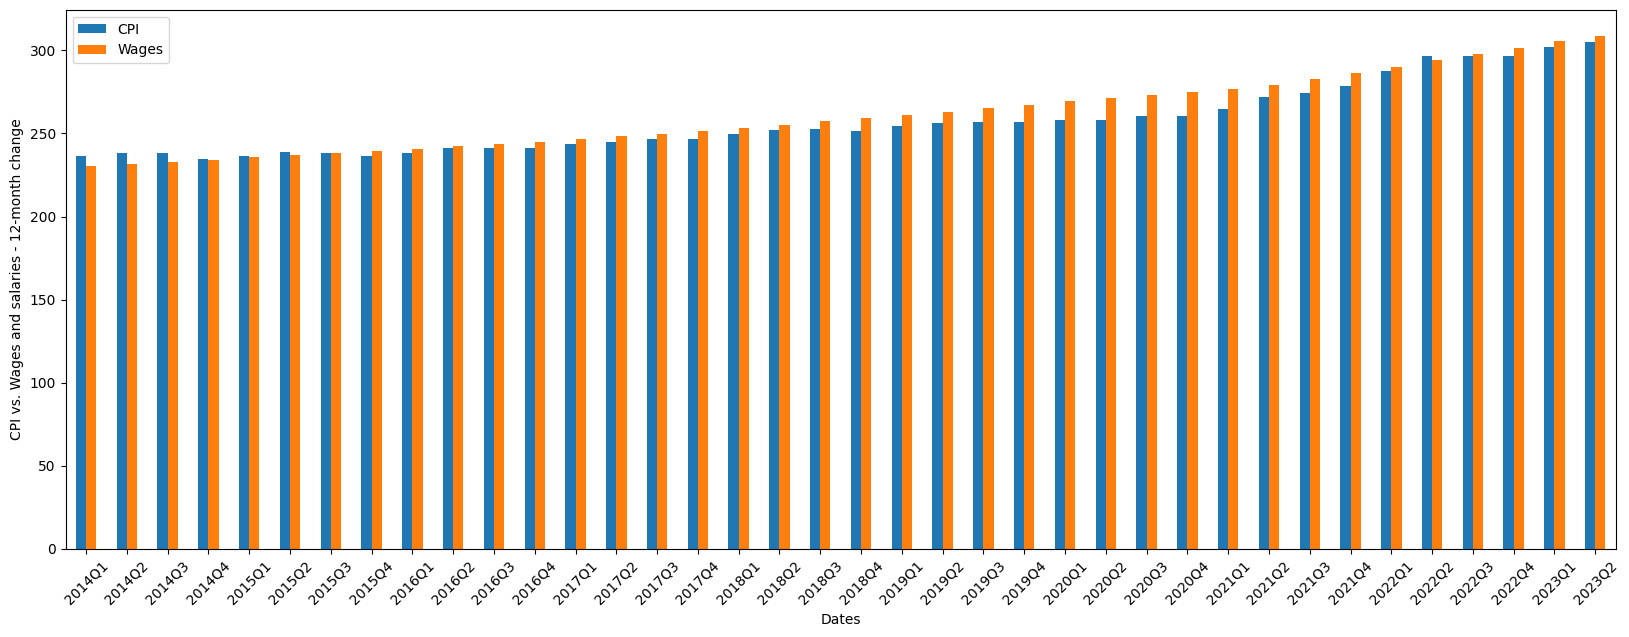

In [17]:
# Plot the data
ax = merged_data.plot(kind = 'bar', figsize=(20,7) )
ax.set_xticklabels(merged_data.Date, rotation =45)
ax.set_ylabel('CPI vs. Wages and salaries - 12-month change')
ax.set_xlabel('Dates')

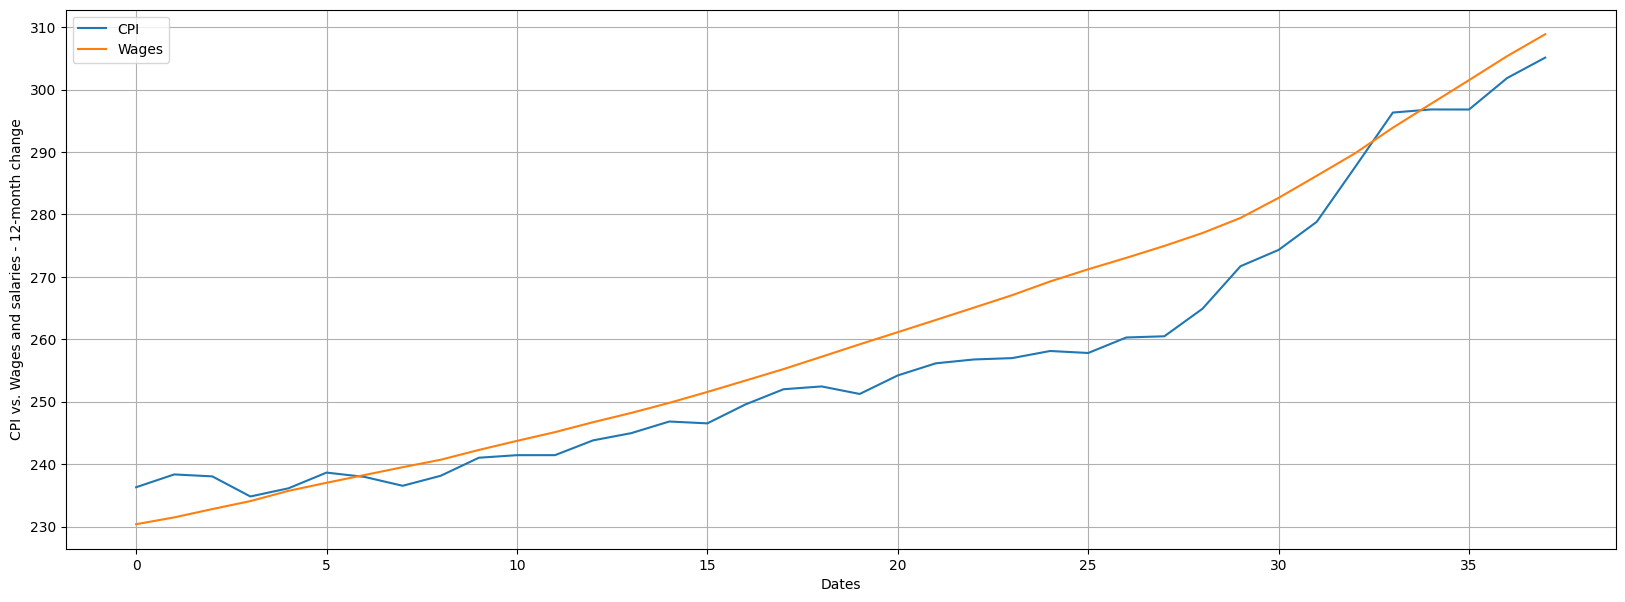

In [18]:
# Plot but with the line
ax = merged_data.plot(kind = 'line', figsize=(20,7))
ax.set_ylabel('CPI vs. Wages and salaries - 12-month change')
ax.set_xlabel('Dates')
ax.grid()

<span style = "font-size:20px;"> **Challenge 1**

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/bls/api.py:106: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.assign(date=pd.to_datetime(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/bls/api.py:106: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.assign(date=pd.to_datetime(


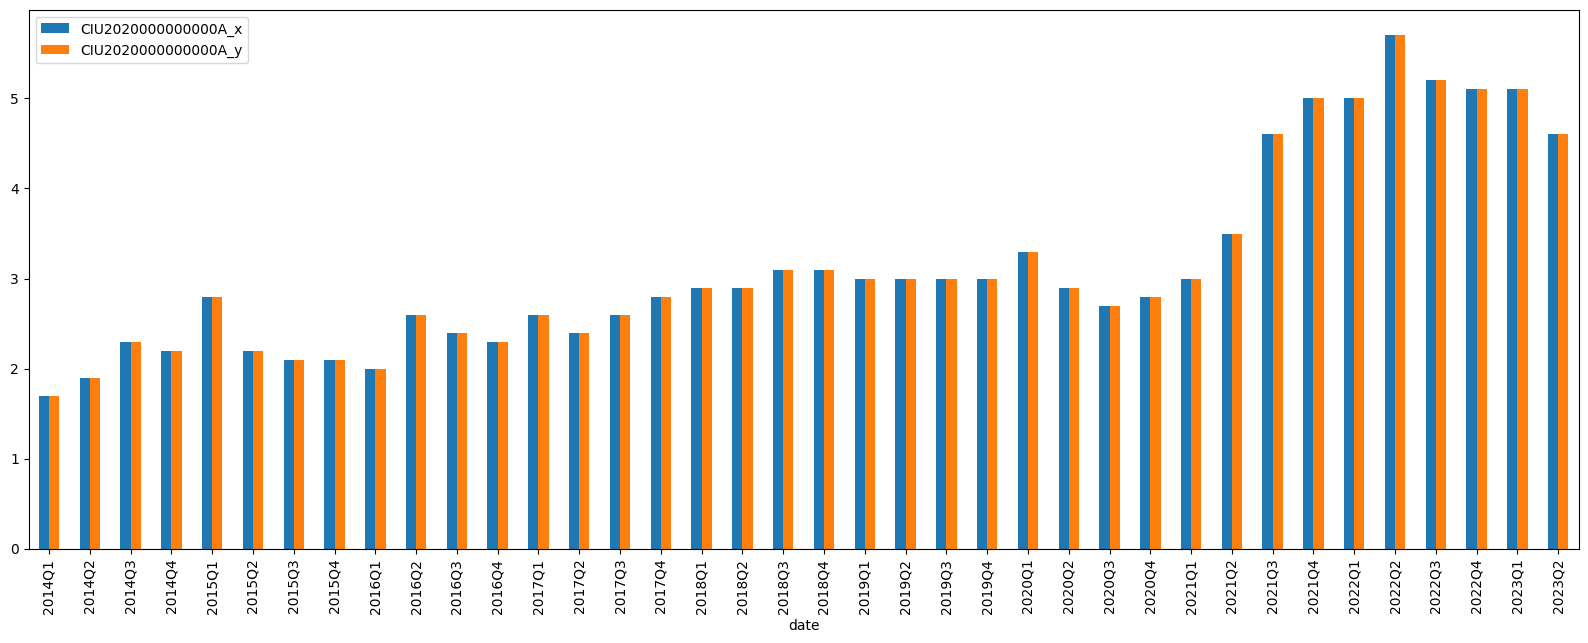

In [19]:
shoes = bls.get_series('CIU2020000000000A')
home = bls.get_series('CIU2020000000000A')
merged_data = pd.merge(shoes, home, on ='date')
ax = merged_data.plot(kind = 'bar', figsize=(20,7))

<span style = "font-size:24px;"> **S&P 500 Quotes**

In [20]:
sp = pd.read_csv('HistoricalPrices-3.csv')
sp.info()

sp.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5033 non-null   object 
 1    Open   5033 non-null   float64
 2    High   5033 non-null   float64
 3    Low    5033 non-null   float64
 4    Close  5033 non-null   float64
dtypes: float64(4), object(1)
memory usage: 196.7+ KB


,Date,Open,High,Low,Close
0,09/11/23,4480.95,4490.77,4467.89,4487.46
1,09/08/23,4451.30,4473.53,4448.38,4457.49
2,09/07/23,4434.55,4457.81,4430.46,4451.14
3,09/06/23,4490.35,4490.35,4442.38,4465.48
4,09/05/23,4510.06,4514.29,4496.01,4496.83


In [21]:
# Clean the data #####
    
# Set Date column to datetime type
sp['Date'] = pd.to_datetime(sp['Date'], format = '%m/%d/%y')
sp['Date'] = sp['Date'].dt.strftime('%Y-%m-%d')

# Replace with quarterly
sp['Date'] =sp['Date'].str.replace('-03-30', 'Q1')
sp['Date'] =sp['Date'].str.replace('-06-30', 'Q2')
sp['Date'] =sp['Date'].str.replace('-09-30', 'Q3')
sp['Date'] =sp['Date'].str.replace('-12-31', 'Q4')

In [22]:
sp = sp[(sp.Date.str.contains('Q') == True)]
sp1 = sp[['Date', ' Close']]
print(sp1.head())

       Date    Close
49   2023Q2  4450.38
112  2023Q1  4050.83
236  2022Q3  3585.62
300  2022Q2  3785.38
363  2022Q1  4602.45


In [24]:
# Merge all 3 datasets
from functools import reduce

dfs = [newcpi_data, newwages, sp1]
df_triple = reduce(lambda left, right: pd.merge(left, right, on=['Date'],
                                                how='outer'),dfs)

Text(0.5, 1.0, 'S&P 500 Index by quarter 2003 - 2023')

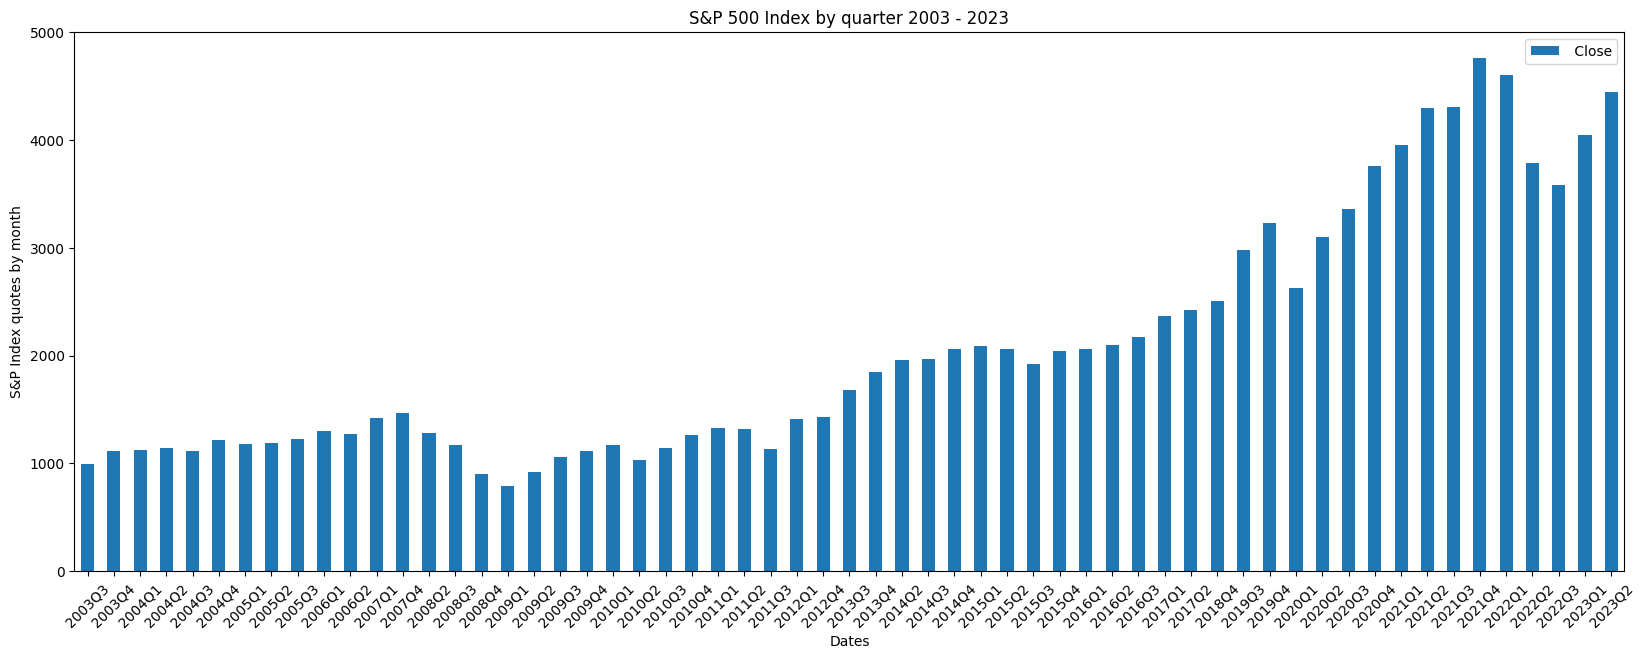

In [31]:
# Make a plot for S&P 500 dataset (sp1)
sp1 = sp1.sort_values(by=['Date'],ascending=True)
ax = sp1.plot(kind='bar', figsize=(20, 7))
ax.set_xticklabels(sp1.Date, rotation=45)
ax.set_ylabel('S&P Index quotes by month')
ax.set_xlabel('Dates')
ax.set_title('S&P 500 Index by quarter 2003 - 2023')

<span style = "font-size:20px;"> **Calculate CAGR using CPI and S&P**

In [35]:
# CAGR for S&P 500:
# Define values
first = 815.28
last = 3756.07
periods = 20

def CAGR(first, last, periods):
    return (last/first)**(1/periods)-1
print('The S&P had a CAGR of {:.2%} '.format(CAGR(first, last, periods)))

The S&P had a CAGR of 7.94% 


In [43]:
# CAGR for CPI
first = 178.8
last = 260.28
periods =20

print('CPI has a CAGR of {:.2%}'.format(CAGR(first, last, periods)))

CPI has a CAGR of 1.90%


In [44]:
# CAGR for Wages
first = 178.64
last = 281.31
periods = 20

print('Wages had a CAGR of {:.2%}'.format(CAGR(first,last, periods)))

Wages had a CAGR of 2.30%
